# This hypothesis test will test the claim that rotational speed does not have a significant impact on machines failing.

### Null: The average rotational speed of failed machines is the same as working machines
### H0: u1 = u2
### Alt: The average rotational speed of failed machines is not the same as working machines
### Ha: u1 != u2 (two-tailed)

### A significance level 0.05 will be used
### alpha = 0.05

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


<p>Read in initial data from csv</p>

In [2]:
initial_data = pd.read_csv('../data/ai4i2020.csv')

In [3]:
failures = initial_data[initial_data["Machine failure"] == 1]
failures.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,0,0,1,0,0
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,0,0,1,1,0
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,1,0,0,0,0
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,0,0,0,1,0
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,0,0,0,1,0


In [4]:
no_failures = initial_data[initial_data["Machine failure"] == 0]
no_failures.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


<Axes: xlabel='Machine failure', ylabel='Rotational speed [rpm]'>

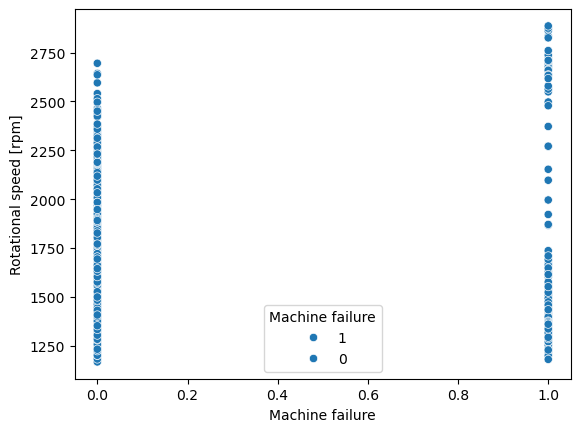

In [5]:
sns.scatterplot(x='Machine failure',
                y='Rotational speed [rpm]', data=failures, hue='Machine failure')
sns.scatterplot(x='Machine failure',
                y='Rotational speed [rpm]', data=no_failures, hue='Machine failure')

In [6]:
rpm_failures = failures['Rotational speed [rpm]']

#### Performing independent t-test

In [7]:
stats.ttest_ind(rpm_failures, no_failures['Rotational speed [rpm]'], equal_var=False, alternative="two-sided")

TtestResult(statistic=-2.086776240544015, pvalue=0.03764747644388529, df=342.4998844387028)

#### Conclusion

<p>
The two-tailed p-value of 0.038 is less than the alpha of 0.05. There is sufficient statistical evidence to reject the null hypothesis.
The negative test statistic indicates the average rmp of failed machines is slower than the working machines.
</p>

In [8]:
# Average RPM for failures
failures["Rotational speed [rpm]"].mean()

1496.486725663717

In [9]:
# Average RPM for working machines
no_failures["Rotational speed [rpm]"].mean()

1540.2600144912535

Text(0.5, 1.0, 'Failures')

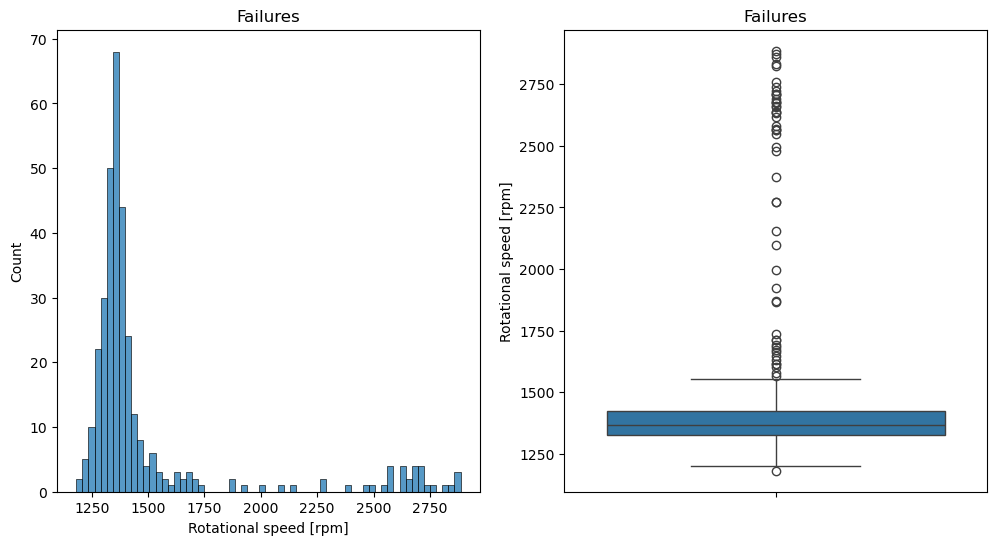

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(ax=axes[0], data=failures["Rotational speed [rpm]"])
sns.boxplot(ax=axes[1], data=failures["Rotational speed [rpm]"])
axes[0].set_title("Failures")
axes[1].set_title("Failures")

Text(0.5, 1.0, 'Non Failures')

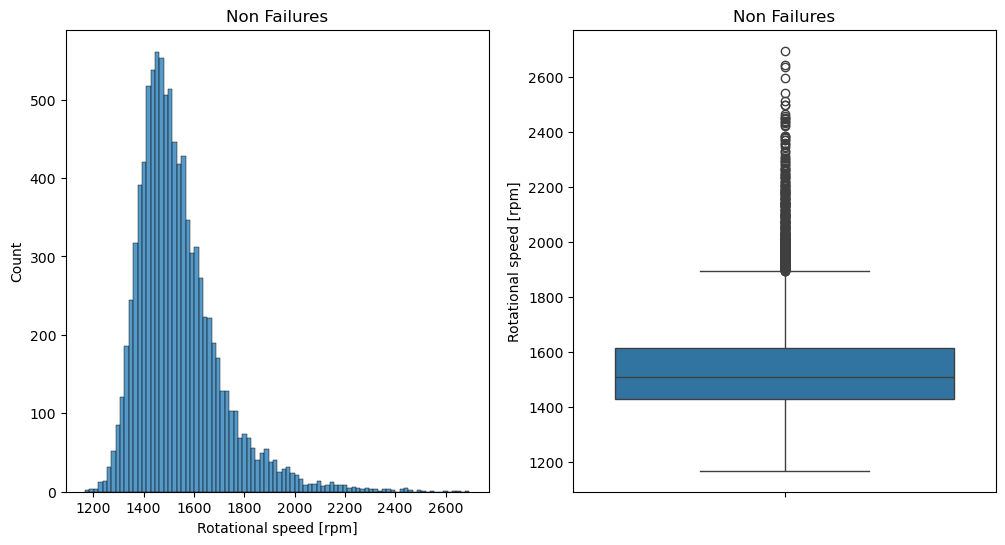

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(ax=axes[0], data=no_failures["Rotational speed [rpm]"])
sns.boxplot(ax=axes[1], data=no_failures["Rotational speed [rpm]"])
axes[0].set_title("Non Failures")
axes[1].set_title("Non Failures")